**2nd semester project** - EDA


Elena Skrtic

Simao Ferreira

Laura Keri

Getting our data from yfinance

In [17]:
pip install -r requirements.txt --quiet

Note: you may need to restart the kernel to use updated packages.


In [18]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#Define the ticker symbol and get data from that
#we got every seven datasets from this snippet of code
tickerSymbol = 'TSLA'
tickerData = yf.Ticker(tickerSymbol)

#Get the historical prices
tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2025-1-1')

#Save the data to CSV
tickerDf.to_csv(f'{tickerSymbol}_df.csv')

EDA

In [20]:
#in this example of EDA we used Amazon dataset
df = pd.read_csv('AMZN_df.csv')

In [21]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-01-04 00:00:00-05:00,6.8125,6.8305,6.6570,6.6950,151998000,0.0,0.0
1,2010-01-05 00:00:00-05:00,6.6715,6.7740,6.5905,6.7345,177038000,0.0,0.0
2,2010-01-06 00:00:00-05:00,6.7300,6.7365,6.5825,6.6125,143576000,0.0,0.0
3,2010-01-07 00:00:00-05:00,6.6005,6.6160,6.4400,6.5000,220604000,0.0,0.0
4,2010-01-08 00:00:00-05:00,6.5280,6.6840,6.4515,6.6760,196610000,0.0,0.0


In [22]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3609.000000,3609.000000,3609.000000,3609.000000,3.609000e+03,3609.0,3609.000000
mean,65.965366,66.726291,65.139128,65.949924,8.522320e+07,0.0,0.005542
std,56.640559,57.307405,55.916230,56.609913,5.185222e+07,0.0,0.332917
min,5.296500,5.564500,5.290000,5.430500,1.762600e+07,0.0,0.000000
25%,14.541000,14.690500,14.341000,14.567000,5.387800e+07,0.0,0.000000
50%,42.442001,42.653500,42.240002,42.431999,7.171200e+07,0.0,0.000000
75%,104.470001,106.790001,103.309998,105.449997,1.002120e+08,0.0,0.000000
max,187.720001,189.770004,185.509995,189.050003,8.484220e+08,0.0,20.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3609 non-null   object 
 1   Open          3609 non-null   float64
 2   High          3609 non-null   float64
 3   Low           3609 non-null   float64
 4   Close         3609 non-null   float64
 5   Volume        3609 non-null   int64  
 6   Dividends     3609 non-null   float64
 7   Stock Splits  3609 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 225.7+ KB


In [24]:
#Checking for missing values
df.isnull()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
3604,False,False,False,False,False,False,False,False
3605,False,False,False,False,False,False,False,False
3606,False,False,False,False,False,False,False,False
3607,False,False,False,False,False,False,False,False


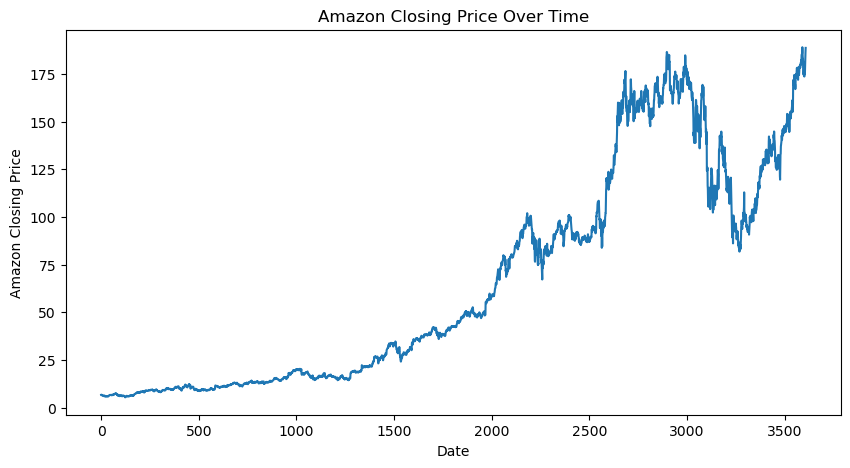

In [25]:
#graph that shows amazon's closing price
df['Close'].plot(figsize=(10, 5), legend=False)
plt.xlabel('Date')
plt.ylabel('Amazon Closing Price')
plt.title('Amazon Closing Price Over Time')
plt.show()

Calculating the moving average of Amazon

In [26]:
#we are calculating the moving averages and adding it as new columns to the dataset
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    df[column_name] = df['Close'].rolling(window=ma,center=False).mean()

df.tail()    

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA for 10 days,MA for 20 days,MA for 50 days
3604,2024-04-30 00:00:00-04:00,181.089996,182.990005,174.800003,175.000000,94639800,0.0,0.0,177.773999,181.2075,178.1138
3605,2024-05-01 00:00:00-04:00,181.639999,185.149994,176.559998,179.000000,94645100,0.0,0.0,177.545999,181.0370,178.3522
3606,2024-05-02 00:00:00-04:00,180.850006,185.100006,179.910004,184.720001,54303500,0.0,0.0,178.095999,181.2730,178.6748
3607,2024-05-03 00:00:00-04:00,186.990005,187.869995,185.419998,186.210007,39172000,0.0,0.0,179.253999,181.3300,178.9074
3608,2024-05-06 00:00:00-04:00,186.279999,188.750000,184.800003,188.699997,34653900,0.0,0.0,180.400999,181.5055,179.1816


Moving average between 2020 and 2021 where we can see the impact of the pandemic

In [27]:
print(df.index.dtype)

int64


In [28]:
df.index = pd.to_datetime(df.index)

(array([-0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06]),
 [Text(-0.06, 0, '−0.06'),
  Text(-0.039999999999999994, 0, '−0.04'),
  Text(-0.019999999999999997, 0, '−0.02'),
  Text(0.0, 0, '0.00'),
  Text(0.020000000000000004, 0, '0.02'),
  Text(0.04000000000000001, 0, '0.04'),
  Text(0.06, 0, '0.06')])

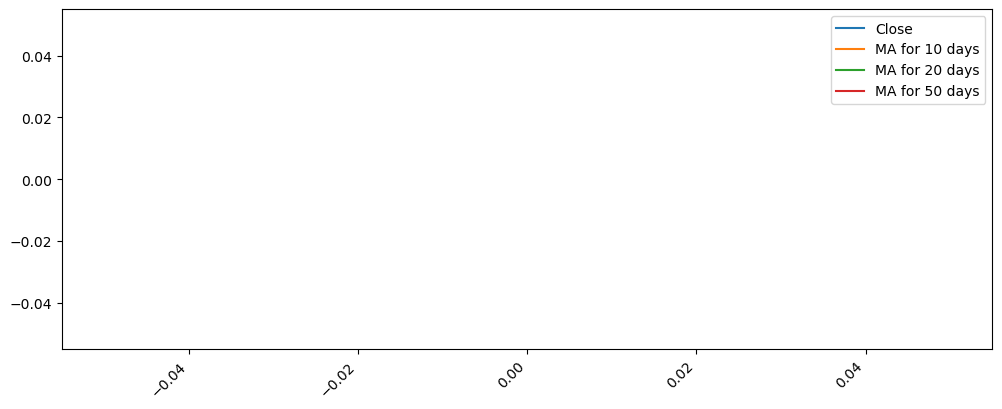

In [29]:
#Moving average between 2020 and 2021 where we can see the impact of the pandemic
df.truncate(before='2020-01-01', after='2021-01-01')[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))
plt.xticks(rotation=45)

Average daily return

In [30]:
#the daily return column can be created by using the percentage change over the adjusted closing price
df['Daily Return'] = df['Close'].pct_change()

In [31]:
df['Daily Return']

1970-01-01 00:00:00.000000000         NaN
1970-01-01 00:00:00.000000001    0.005900
1970-01-01 00:00:00.000000002   -0.018116
1970-01-01 00:00:00.000000003   -0.017013
1970-01-01 00:00:00.000000004    0.027077
                                   ...   
1970-01-01 00:00:00.000003604   -0.032935
1970-01-01 00:00:00.000003605    0.022857
1970-01-01 00:00:00.000003606    0.031955
1970-01-01 00:00:00.000003607    0.008066
1970-01-01 00:00:00.000003608    0.013372
Name: Daily Return, Length: 3609, dtype: float64

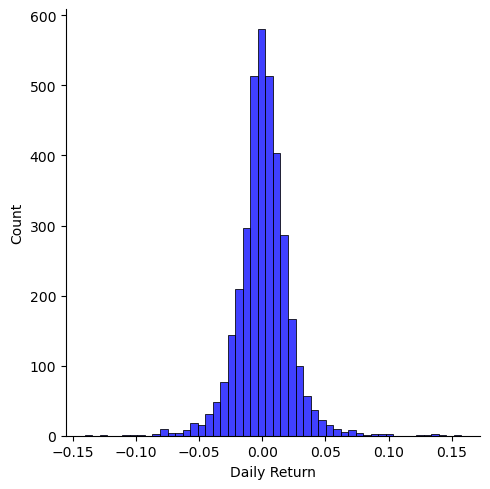

In [32]:
#showing a graph for the daily return
sns.displot(df['Daily Return'].dropna(),bins=50,color='blue')